<a href="https://colab.research.google.com/github/qwertyqwertyqwertyqwerty123/colab_projects/blob/main/linear_dense_neiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание

Создайте систему компьютерного зрения, которая будет определять тип геометрической фигуры. Используя подготовленную базу и шаблон ноутбука проведите серию экспериментов по перебору гиперпараметров нейронной сети, распознающей три категории изображений (треугольник, круг, квадрат).

1. Поменяйте количество нейронов в сети, используя следующие значения:

- один слой 10 нейронов
- один слой 100 нейронов
- один слой 5000 нейронов.

2. Поменяйте активационную функцию в скрытых слоях с `relu` на `linear`.
3. Поменяйте размеры batch_size:
- 10
- 100
- 1000

4. Выведите на экран получившиеся точности.

In [ ]:
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam
# Подключение утилит для to_categorical
from tensorflow.keras import utils
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt
# Подключение модуля для работы с файлами
import os
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

In [ ]:
# Загрузка датасета из облака
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_light.zip', None, quiet=True)

'hw_light.zip'

In [ ]:
# Распаковываем архив hw_light.zip в папку hw_light
!unzip -q hw_light.zip

# МОДЕЛЬ 1

Размер массива x_train_org (302, 20, 20, 1)
Размер массива y_train_org (302,)


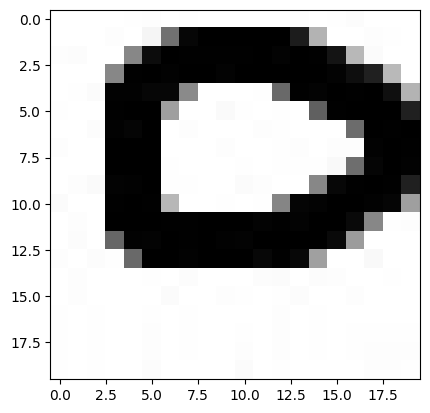

0
Форма обучающих данных: (302, 20, 20, 1) -> (302, 400)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 800)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 400)                 │         320,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 3)                   │           1,203 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642,403 (2.45 MB)

 Trainable params: 642,403 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3742 - loss: 1.1242
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.3444 - loss: 1.7455
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4503 - loss: 1.4821
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5099 - loss: 0.9044
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4570 - loss: 0.9831
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5629 - loss: 0.8318
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6093 - loss: 0.7504
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7649 - loss: 0.6876
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6887 - loss: 0.7362
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6623 - loss: 0.7272
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7682 - loss: 0.6229
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8444 - loss: 0.56

In [ ]:
# MODEL №1 400+relu

# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train_org', x_train_org.shape)
print('Размер массива y_train_org', y_train_org.shape)
n = 12
# Отрисовка и вывод модели
plt.imshow(x_train_org[n], cmap='gray')
plt.show()
print(y_train[n])

# Изменение формы изображений
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')

x_train = x_train.astype('float32') / 255.

# Кол-во распознаваемых групп фигур
CLASS_COUNT = 3

y_train = utils.to_categorical(y_train_org, CLASS_COUNT)

# Cоздание модели, добавление слоев нейронов
model = Sequential()
model.add(Dense(800, input_dim=400, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(CLASS_COUNT, activation='softmax'))

# Компиляция
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=1000, # кол-во примеров
          epochs=15,      # кол-во эпох
          verbose=1)

# МОДЕЛЬ 2

Размер массива x_train_org (302, 20, 20, 1)
Размер массива y_train_org (302,)


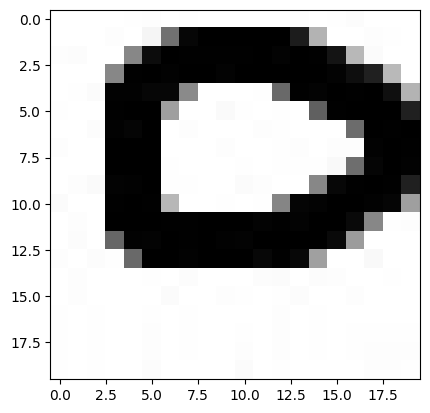

0
Форма обучающих данных: (302, 20, 20, 1) -> (302, 400)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                     │ (None, 800)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 10)                  │           8,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,843 (1.25 MB)

 Trainable params: 328,843 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3278 - loss: 2.0698
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3576 - loss: 1.1270
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3742 - loss: 1.1223
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5132 - loss: 0.9872
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4106 - loss: 1.0173
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5265 - loss: 0.9217
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5265 - loss: 0.9118
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5132 - loss: 0.8935
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5795 - loss: 0.8346
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5464 - loss: 0.8478
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5762 - loss: 0.8162
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5993 - loss: 0.790

In [ ]:
# MODEL №2 10+relu

# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train_org', x_train_org.shape)
print('Размер массива y_train_org', y_train_org.shape)

n = 12
# Отрисовка и вывод модели
plt.imshow(x_train_org[n], cmap='gray')
plt.show()
print(y_train[n])

# Изменение формы изображений
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')

x_train = x_train.astype('float32') / 255.

# Кол-во распознаваемых групп фигур
CLASS_COUNT = 3

y_train = utils.to_categorical(y_train_org, CLASS_COUNT)

# Cоздание модели, добавление слоев нейронов
model = Sequential()
model.add(Dense(800, input_dim=400, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(CLASS_COUNT, activation='softmax'))

# Компиляция
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=1000, # кол-во примеров
          epochs=15,      # кол-во эпох
          verbose=1)


# МОДЕЛЬ 3

Размер массива x_train_org (302, 20, 20, 1)
Размер массива y_train_org (302,)


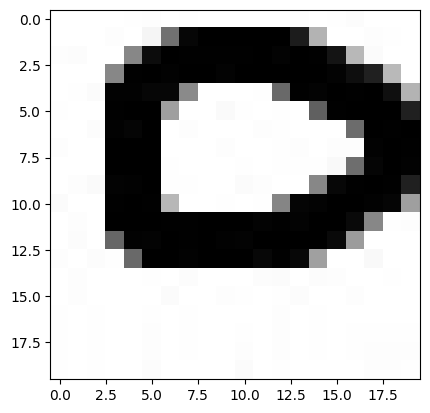

0
Форма обучающих данных: (302, 20, 20, 1) -> (302, 400)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 800)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 100)                 │          80,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401,203 (1.53 MB)

 Trainable params: 401,203 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3411 - loss: 1.1649
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5397 - loss: 1.4158
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5430 - loss: 0.8637
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5265 - loss: 0.8261
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5232 - loss: 0.8397
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5894 - loss: 0.7565
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7649 - loss: 0.7264
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7086 - loss: 0.7199
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7483 - loss: 0.6895
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7980 - loss: 0.6356
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7914 - loss: 0.6006
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7781 - loss: 0.578

In [ ]:
# MODEL №3 100 relu

# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train_org', x_train_org.shape)
print('Размер массива y_train_org', y_train_org.shape)

n = 12
# Отрисовка и вывод модели
plt.imshow(x_train_org[n], cmap='gray')
plt.show()
print(y_train[n])

# Изменение формы изображений
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')

x_train = x_train.astype('float32') / 255.

# Кол-во распознаваемых групп фигур
CLASS_COUNT = 3

y_train = utils.to_categorical(y_train_org, CLASS_COUNT)

# Cоздание модели, добавление слоев нейронов
model = Sequential()
model.add(Dense(800, input_dim=400, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(CLASS_COUNT, activation='softmax'))

# Компиляция
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=1000, # кол-во примеров
          epochs=15,      # кол-во эпох
          verbose=1)


# МОДЕЛЬ 4

Размер массива x_train_org (302, 20, 20, 1)
Размер массива y_train_org (302,)


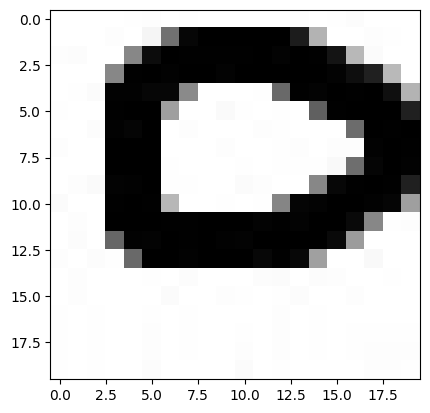

0
Форма обучающих данных: (302, 20, 20, 1) -> (302, 400)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                     │ (None, 800)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 5000)                │       4,005,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 3)                   │          15,003 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,340,803 (16.56 MB)

 Trainable params: 4,340,803 (16.56 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3609 - loss: 1.1262
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3311 - loss: 5.6454
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5563 - loss: 0.9068
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5331 - loss: 1.2327
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5762 - loss: 1.1910
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6325 - loss: 0.9245
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7020 - loss: 0.7543
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7649 - loss: 0.6896
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6225 - loss: 0.7121
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6060 - loss: 0.7020
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7086 - loss: 0.6395
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7980 - loss: 0.587

In [ ]:
# MODEL №4 5000+relu

# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train_org', x_train_org.shape)
print('Размер массива y_train_org', y_train_org.shape)

n = 12
# Отрисовка и вывод модели
plt.imshow(x_train_org[n], cmap='gray')
plt.show()
print(y_train[n])

# Изменение формы изображений
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')

x_train = x_train.astype('float32') / 255.

# Кол-во распознаваемых групп фигур
CLASS_COUNT = 3

y_train = utils.to_categorical(y_train_org, CLASS_COUNT)

# Cоздание модели, добавление слоев нейронов
model = Sequential()
model.add(Dense(800, input_dim=400, activation='relu'))
model.add(Dense(5000, activation='relu'))
model.add(Dense(CLASS_COUNT, activation='softmax'))

# Компиляция
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=1000, # кол-во примеров
          epochs=15,      # кол-во эпох
          verbose=1)


# МОДЕЛЬ 5

Размер массива x_train_org (302, 20, 20, 1)
Размер массива y_train_org (302,)


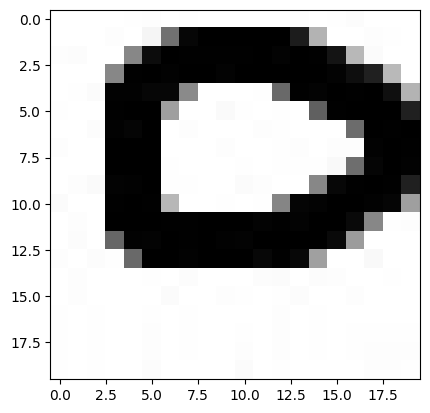

0
Форма обучающих данных: (302, 20, 20, 1) -> (302, 400)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 800)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 400)                 │         320,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 3)                   │           1,203 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642,403 (2.45 MB)

 Trainable params: 642,403 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4503 - loss: 1.6087
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3311 - loss: 9.6296
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3311 - loss: 10.3274
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3444 - loss: 5.6155
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5397 - loss: 1.6783
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4007 - loss: 2.3774
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3709 - loss: 3.2066
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5530 - loss: 2.2132
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5132 - loss: 1.7915
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5596 - loss: 1.4235
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5397 - loss: 1.4146
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4801 - loss: 1.89

In [ ]:
# MODEL №5 10+relu

# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train_org', x_train_org.shape)
print('Размер массива y_train_org', y_train_org.shape)

n = 12
# Отрисовка и вывод модели
plt.imshow(x_train_org[n], cmap='gray')
plt.show()
print(y_train[n])

# Изменение формы изображений
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')

x_train = x_train.astype('float32') / 255.

# Кол-во распознаваемых групп фигур
CLASS_COUNT = 3

y_train = utils.to_categorical(y_train_org, CLASS_COUNT)

# Cоздание модели, добавление слоев нейронов
model = Sequential()
model.add(Dense(800, input_dim=400, activation='linear'))
model.add(Dense(400, activation='linear'))
model.add(Dense(CLASS_COUNT, activation='softmax'))

# Компиляция
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=1000, # кол-во примеров
          epochs=15,      # кол-во эпох
          verbose=1)


# МОДЕЛЬ 6

Размер массива x_train_org (302, 20, 20, 1)
Размер массива y_train_org (302,)


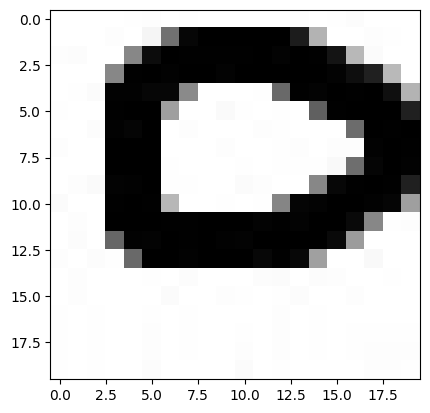

0
Форма обучающих данных: (302, 20, 20, 1) -> (302, 400)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 800)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 400)                 │         320,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 3)                   │           1,203 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642,403 (2.45 MB)

 Trainable params: 642,403 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4064 - loss: 1.6213
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7598 - loss: 0.5915 
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7733 - loss: 0.5317 
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8130 - loss: 0.4553
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8809 - loss: 0.3405
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9149 - loss: 0.2532
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9411 - loss: 0.1756
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9281 - loss: 0.2507
Epoch 9/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9804 - loss: 0.1000
Epoch 10/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9775 - loss: 0.0717
Epoch 11/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0594
Epoch 12/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9

In [ ]:
# MODEL №6 (400 relu batch_size 10)

# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train_org', x_train_org.shape)
print('Размер массива y_train_org', y_train_org.shape)

n = 12
# Отрисовка и вывод модели
plt.imshow(x_train_org[n], cmap='gray')
plt.show()
print(y_train[n])

# Изменение формы изображений
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')

x_train = x_train.astype('float32') / 255.

# Кол-во распознаваемых групп фигур
CLASS_COUNT = 3

y_train = utils.to_categorical(y_train_org, CLASS_COUNT)

# Cоздание модели, добавление слоев нейронов
model = Sequential()
model.add(Dense(800, input_dim=400, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(CLASS_COUNT, activation='softmax'))

# Компиляция
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=10, # кол-во примеров
          epochs=15,      # кол-во эпох
          verbose=1)


# МОДЕЛЬ 7

Размер массива x_train_org (302, 20, 20, 1)
Размер массива y_train_org (302,)


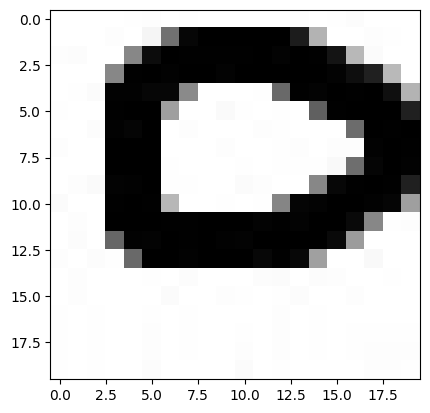

0
Форма обучающих данных: (302, 20, 20, 1) -> (302, 400)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                     │ (None, 800)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 400)                 │         320,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 3)                   │           1,203 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642,403 (2.45 MB)

 Trainable params: 642,403 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.3254 - loss: 1.6557
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4591 - loss: 1.1681  
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5847 - loss: 0.8275 
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4668 - loss: 1.0500 
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7328 - loss: 0.6850 
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6090 - loss: 0.8759 
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.5674 
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6978 - loss: 0.6649 
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7446 - loss: 0.5735 
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7852 - loss: 0.5732 
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7982 - loss: 0.5144 
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8451 - loss: 0.4

In [ ]:
# MODEL №6 (400 relu batch_size 100)

# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train_org', x_train_org.shape)
print('Размер массива y_train_org', y_train_org.shape)

n = 12
# Отрисовка и вывод модели
plt.imshow(x_train_org[n], cmap='gray')
plt.show()
print(y_train[n])

# Изменение формы изображений
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')

x_train = x_train.astype('float32') / 255.

# Кол-во распознаваемых групп фигур
CLASS_COUNT = 3

y_train = utils.to_categorical(y_train_org, CLASS_COUNT)

# Cоздание модели, добавление слоев нейронов
model = Sequential()
model.add(Dense(800, input_dim=400, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(CLASS_COUNT, activation='softmax'))

# Компиляция
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=100, # кол-во примеров
          epochs=15,      # кол-во эпох
          verbose=1)


# МОДЕЛЬ 8

Размер массива x_train_org (302, 20, 20, 1)
Размер массива y_train_org (302,)


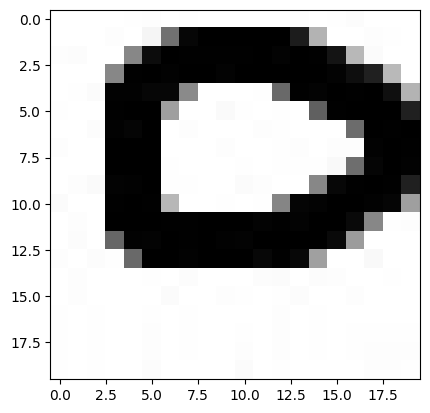

0
Форма обучающих данных: (302, 20, 20, 1) -> (302, 400)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 800)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 10)                  │           8,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,843 (1.25 MB)

 Trainable params: 328,843 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3543 - loss: 1.1798
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.3311 - loss: 1.2155
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4305 - loss: 1.0552
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3510 - loss: 1.0455
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3709 - loss: 1.0198
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3974 - loss: 0.9771
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5596 - loss: 0.9031
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5033 - loss: 0.8877
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 0.8866
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5430 - loss: 0.8500
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5629 - loss: 0.8139
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5695 - loss: 0.80

In [ ]:
# MODEL №8 (400 relu batch_size 1000)

# Путь к директории с базой
base_dir = '/content/hw_light'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                    target_size=(img_height, img_width),
                                                    color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        elif patch == '3':
            y_train.append(1)
        else:
            y_train.append(2)

# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_org = np.array(x_train)
y_train_org = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train_org', x_train_org.shape)
print('Размер массива y_train_org', y_train_org.shape)

n = 12
# Отрисовка и вывод модели
plt.imshow(x_train_org[n], cmap='gray')
plt.show()
print(y_train[n])

# Изменение формы изображений
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')

x_train = x_train.astype('float32') / 255.

# Кол-во распознаваемых групп фигур
CLASS_COUNT = 3

y_train = utils.to_categorical(y_train_org, CLASS_COUNT)

# Cоздание модели, добавление слоев нейронов
model = Sequential()
model.add(Dense(800, input_dim=400, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(CLASS_COUNT, activation='softmax'))

# Компиляция
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=1000, # кол-во примеров
          epochs=15,      # кол-во эпох
          verbose=1)


# RESULTS

BEST: MODEL №6 (400, relu, batch_size 10) accuracy 0,9991 on 14 epoch